In [1]:
%pip install textblob
%pip install wordcloud
%pip install tweepy
%pip install streamlit
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install re
%pip install numpy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
consumerKey = 'XpwCpsjeXRKMImORrfnMkR7YE'
consumerSecret = 'puiGr3ts6TCaRgo8yrBgNXC6NBhUynRPZdwsShtbBcu8YAm4jY'
accessToken = '992426210595688448-6XZeXmJV9aLFY8y1kN0fRRB2a5kOIHG'
accessTokenSecret = '3wpmZT7I7cta9RsukyHYLfssduDY7qbMOALTLfCJDxrxf'


In [4]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)


In [5]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)


In [6]:
# Extract 100 tweets from the twitter user
posts = api.home_timeline(screen_name="ArvindKejriwal",
                          count=100, lang="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Unexpected parameter: screen_name
Unexpected parameter: lang


Show the 5 recent tweets:

1) It’s awesome 😎 https://t.co/ntKoKXZwYs

2) RT @SpaceX: Deployment of 29 @Starlink satellites confirmed https://t.co/KdwO5lIPvS

3) RT @XFreeze: Lots of positive feedback for Grokipedia so far, and people are loving it

This is just v0.1...

Elon Musk said that the next…

4) Thanks bro ❤️ https://t.co/EwdVOcIdMN

5) RT @thatsKAIZEN: Just 5 minutes on Grokipedia reveals that Wikipedia has been pushing far-left talking points for years, and Grokipedia is…



In [7]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()


,Tweets
0,It’s awesome 😎 https://t.co/ntKoKXZwYs
1,RT @SpaceX: Deployment of 29 @Starlink satelli...
2,RT @XFreeze: Lots of positive feedback for Gro...
3,Thanks bro ❤️ https://t.co/EwdVOcIdMN
4,RT @thatsKAIZEN: Just 5 minutes on Grokipedia ...


In [8]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text)  # Removing @mentions
 text = re.sub('#', '', text)  # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text)  # Removing RT
 text = re.sub('https?:\/\/\S+', '', text)  # Removing hyperlink

 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df


,Tweets
0,It’s awesome 😎
1,: Deployment of 29 satellites confirmed
2,: Lots of positive feedback for Grokipedia so ...
3,Thanks bro ❤️
4,: Just 5 minutes on Grokipedia reveals that Wi...
...,...
92,: Tesla investors:\n\nI used to have a front-r...
93,": Wikipedia, in light of a strong launch from ..."
94,: Grokipedia stays updated with real-time edit...
95,How to fix mistakes in Grokipedia


In [9]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity


def getPolarity(text):
   return TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df


,Tweets,Subjectivity,Polarity
0,It’s awesome 😎,1.000000,1.000000
1,: Deployment of 29 satellites confirmed,1.000000,0.400000
2,: Lots of positive feedback for Grokipedia so ...,0.831818,0.309091
3,Thanks bro ❤️,0.200000,0.200000
4,: Just 5 minutes on Grokipedia reveals that Wi...,0.000000,0.000000
...,...,...,...
92,: Tesla investors:\n\nI used to have a front-r...,0.333333,0.250000
93,": Wikipedia, in light of a strong launch from ...",0.644444,0.444444
94,: Grokipedia stays updated with real-time edit...,0.100000,0.000000
95,How to fix mistakes in Grokipedia,0.000000,0.000000


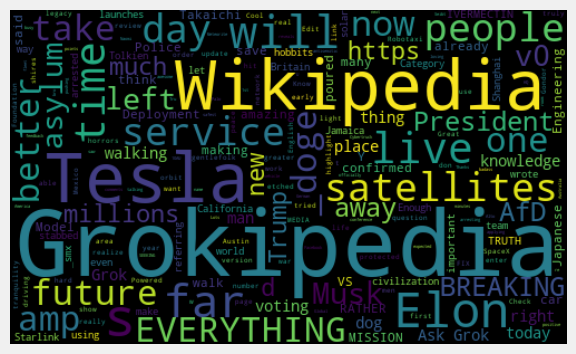

In [10]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21,
                      max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [11]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df


,Tweets,Subjectivity,Polarity,Analysis
0,It’s awesome 😎,1.000000,1.000000,Positive
1,: Deployment of 29 satellites confirmed,1.000000,0.400000,Positive
2,: Lots of positive feedback for Grokipedia so ...,0.831818,0.309091,Positive
3,Thanks bro ❤️,0.200000,0.200000,Positive
4,: Just 5 minutes on Grokipedia reveals that Wi...,0.000000,0.000000,Neutral
...,...,...,...,...
92,: Tesla investors:\n\nI used to have a front-r...,0.333333,0.250000,Positive
93,": Wikipedia, in light of a strong launch from ...",0.644444,0.444444,Positive
94,: Grokipedia stays updated with real-time edit...,0.100000,0.000000,Neutral
95,How to fix mistakes in Grokipedia,0.000000,0.000000,Neutral


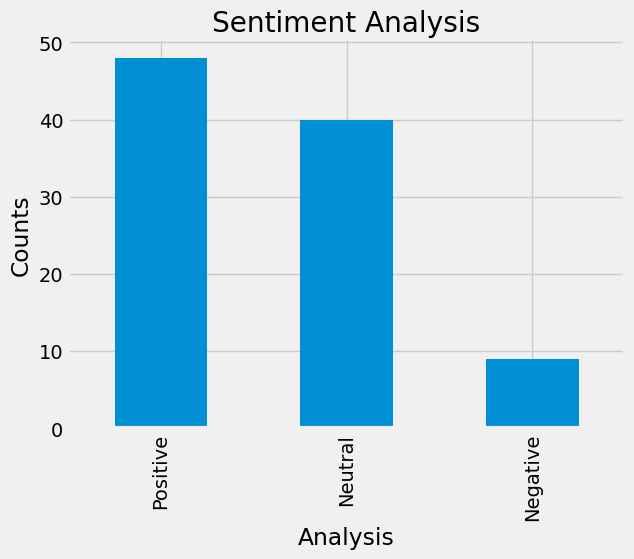

In [12]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
